In [7]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

Fuel Consumption

In [8]:
import stats_can
eco_vec_map = {'Canada Total Passengers':'v11743',
               'Canada Total Passenger-kilometres':'v11744',
               'Canada Total Available Seat-kilometres':'v107645152',
               'Canada Load Factor':'v107645153',
               'Canada Total Hours Flown':'v11747',
               'Canada Total Turbo Fuel Consumed':'v11748',
               'Canada Total Operating Revenues':'v11749'}

vectors = list(eco_vec_map.values())
df = stats_can.sc.vectors_to_df(vectors, periods = 36)

inv_map = {v: k for k, v in eco_vec_map.items()}
df.columns = df.columns.to_series().map(inv_map)
df.index.names = ['Date']

df

,Canada Total Passengers,Canada Total Passenger-kilometres,Canada Total Hours Flown,Canada Total Turbo Fuel Consumed,Canada Total Operating Revenues,Canada Total Available Seat-kilometres,Canada Load Factor
Date,,,,,,,
2020-01-01,7092.0,18629755.0,199.0,695002.0,2082512.0,22706652.0,82.0
2020-02-01,6946.0,17108913.0,183.0,631811.0,1848036.0,20678728.0,82.7
2020-03-01,4322.0,10927569.0,147.0,507419.0,1311953.0,16904614.0,64.6
2020-04-01,213.0,436596.0,17.0,72362.0,180885.0,1676064.0,26.0
2020-05-01,227.0,457303.0,13.0,97404.0,252847.0,1342008.0,34.1
2020-06-01,449.0,888288.0,22.0,103392.0,244133.0,1934285.0,45.9
2020-07-01,860.0,1664868.0,36.0,132715.0,293917.0,4009307.0,41.5
2020-08-01,1106.0,2283315.0,40.0,148766.0,354239.0,4676531.0,48.8
2020-09-01,931.0,1961233.0,38.0,141477.0,342892.0,4462336.0,44.0


In [9]:
df.describe()

,Canada Total Passengers,Canada Total Passenger-kilometres,Canada Total Hours Flown,Canada Total Turbo Fuel Consumed,Canada Total Operating Revenues,Canada Total Available Seat-kilometres,Canada Load Factor
count,36.000000,3.600000e+01,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000
mean,3043.444444,7.581237e+06,89.055556,318709.805556,1.008465e+06,1.035203e+07,61.641667
std,2388.551617,6.450883e+06,59.573218,191919.031523,7.425916e+05,7.196741e+06,18.565257
min,213.000000,4.365960e+05,13.000000,72362.000000,1.808850e+05,1.342008e+06,26.000000
25%,832.250000,1.676151e+06,35.750000,143112.000000,3.270440e+05,4.000172e+06,44.325000
50%,2834.500000,6.674350e+06,89.500000,309802.500000,8.668405e+05,9.995207e+06,66.450000
75%,5340.500000,1.336577e+07,146.250000,493948.250000,1.616127e+06,1.692857e+07,79.700000
max,7092.000000,1.892140e+07,199.000000,695002.000000,2.429620e+06,2.270665e+07,86.900000


In [10]:
df.isnull().sum()

Canada Total Passengers                   0
Canada Total Passenger-kilometres         0
Canada Total Hours Flown                  0
Canada Total Turbo Fuel Consumed          0
Canada Total Operating Revenues           0
Canada Total Available Seat-kilometres    0
Canada Load Factor                        0
dtype: int64

<AxesSubplot: ylabel='Count'>

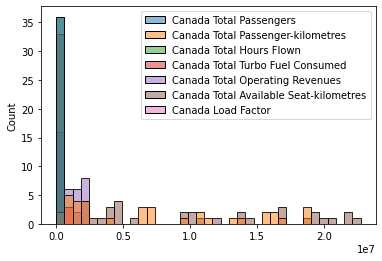

In [11]:
sns.histplot(df)

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

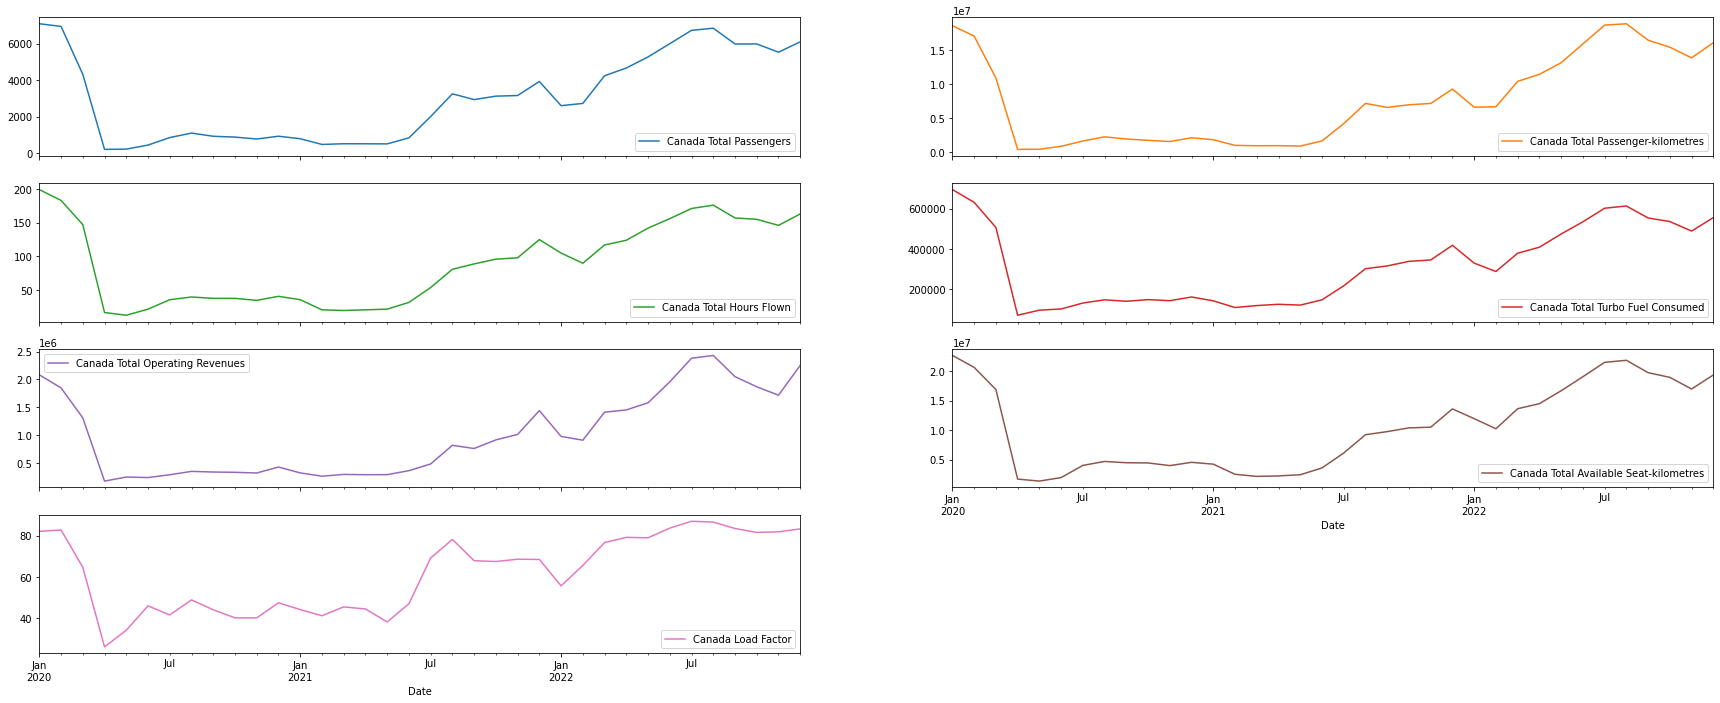

In [12]:
df.plot(subplots = True, figsize = (30,30), layout = (10,2))